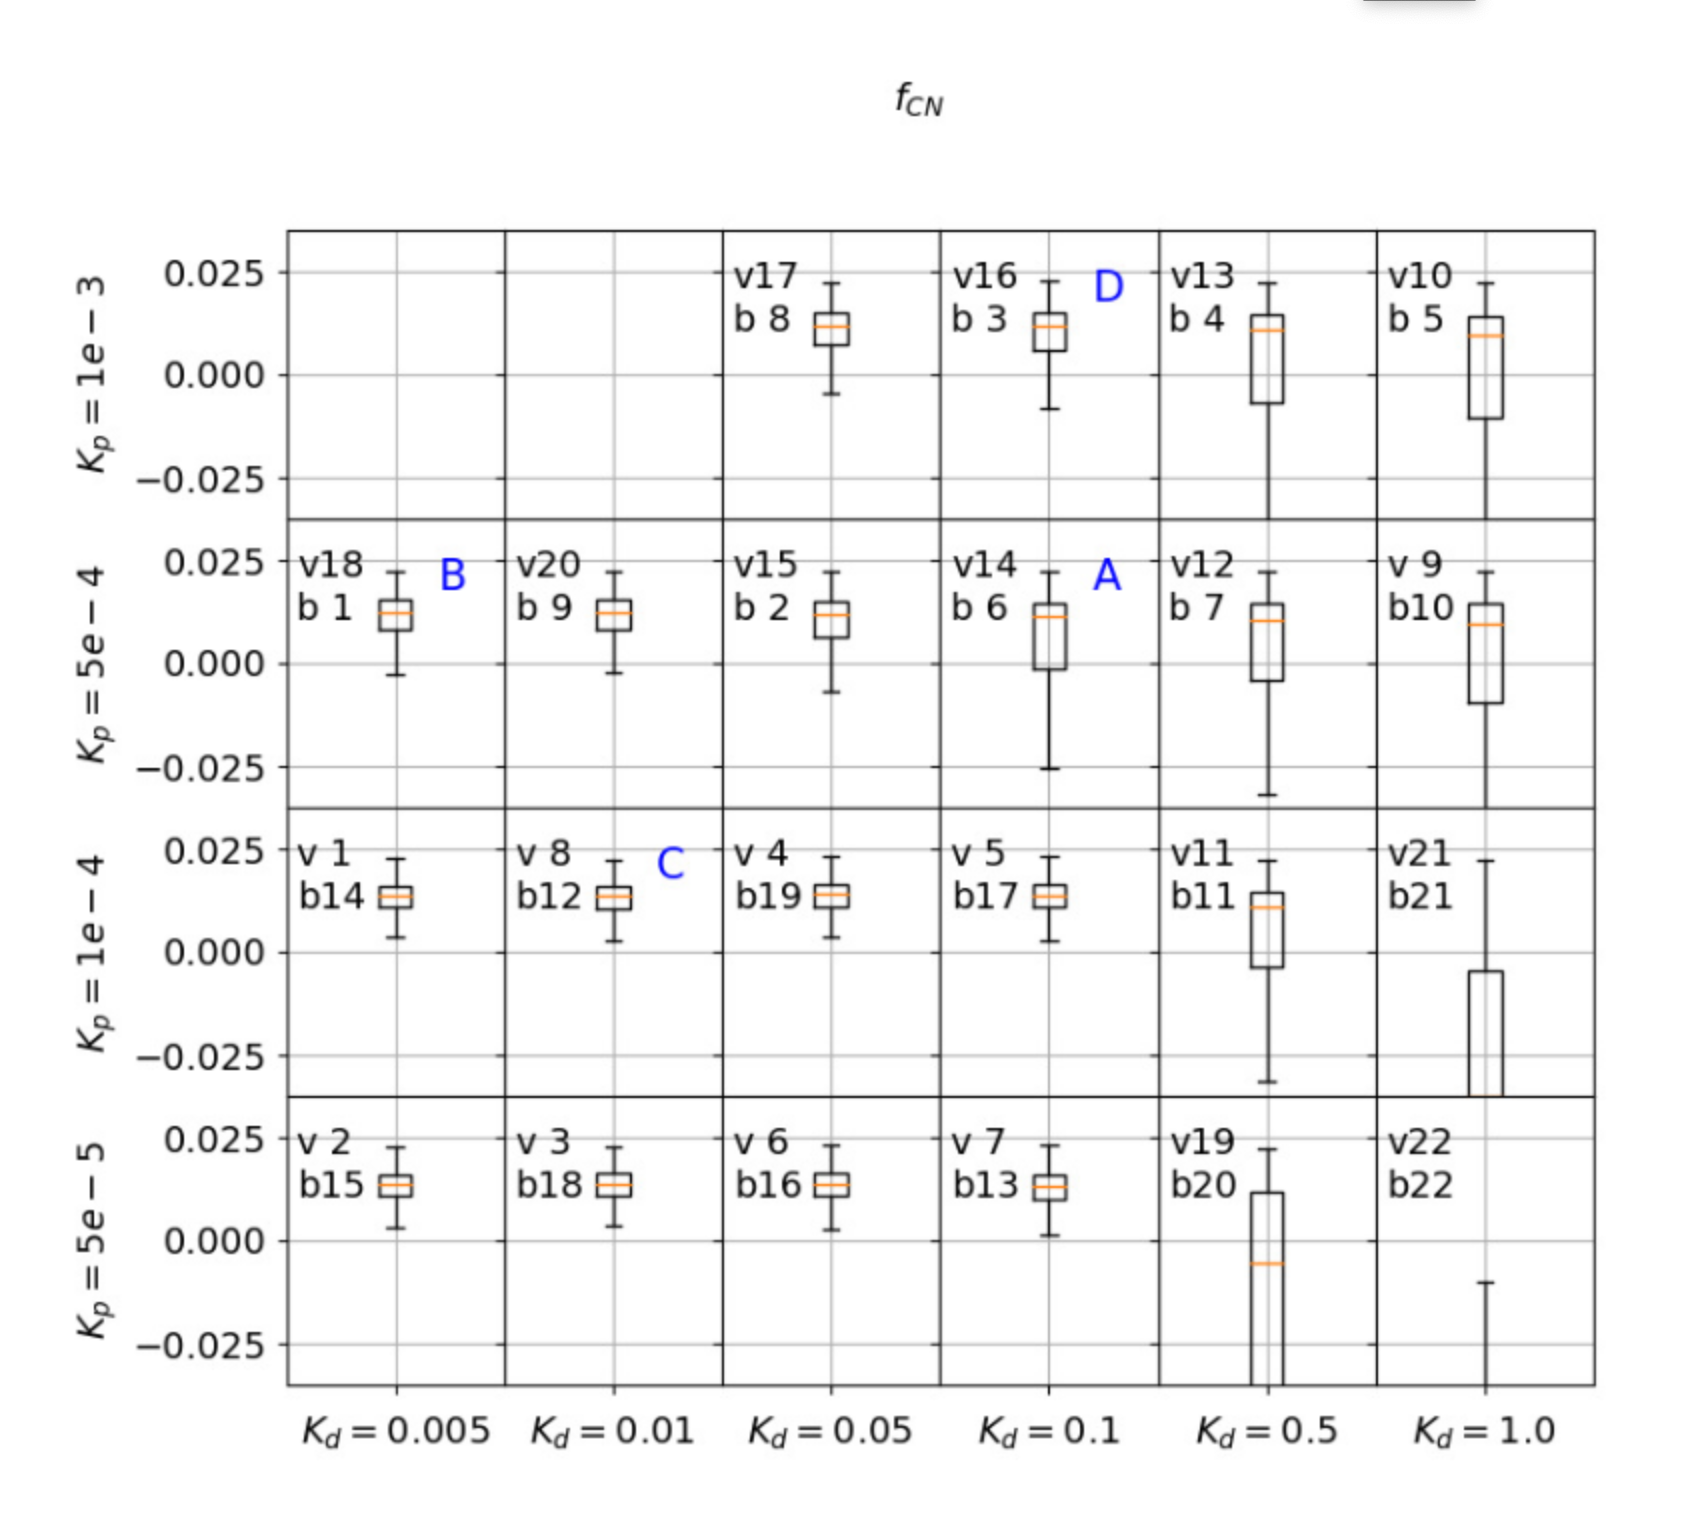

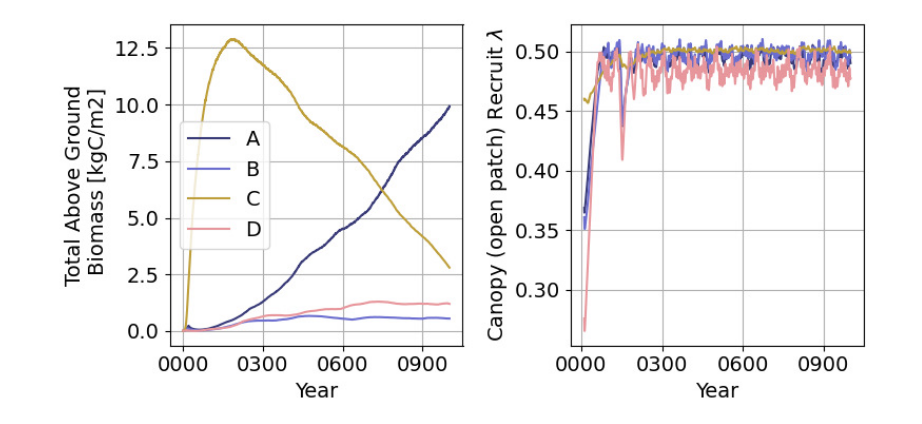

Source : Knox 2023 (under review; https://d197for5662m48.cloudfront.net/documents/publicationstatus/129549/preprint_pdf/4892791c8be5504aff47afd6065937b7.pdf)


In [1]:
from IPython.display import Image, display
display(Image(filename='/Users/ud4/Downloads/PIDs.png',width=800))
display(Image(filename='/Users/ud4/Downloads/BiomassVsPIDs.png',width=800))
print ("Source : Knox 2023 (under review; https://d197for5662m48.cloudfront.net/documents/publicationstatus/129549/preprint_pdf/4892791c8be5504aff47afd6065937b7.pdf)")

In [17]:
import os,glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyreadr # to read .rds files

In [18]:
path_in = "/Users/ud4/FATESMDS_analysis/outputs/runs/tests_alp/230309/"


In [19]:
# RD only

fnames={}
fnames["DUK_PIDA_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_US-DUK_trans.nc"
fnames["ORN_PIDA_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_US-ORN_trans.nc"

fnames["DUK_PIDB_Conly"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDB_AgBgW_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDB_AgBgW_US-DUK_trans.nc"
fnames["ORN_PIDB_Conly"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDB_AgBgW_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDB_AgBgW_US-ORN_trans.nc"

fnames["DUK_PIDC_Conly"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDC_AgBgW_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDC_AgBgW_US-DUK_trans.nc"
fnames["ORN_PIDC_Conly"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDC_AgBgW_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDC_AgBgW_US-ORN_trans.nc"

fnames["DUK_PIDD_Conly"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDD_AgBgW_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDD_AgBgW_US-DUK_trans.nc"
fnames["ORN_PIDD_Conly"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDD_AgBgW_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDD_AgBgW_US-ORN_trans.nc"

fnames["DUK_PIDA_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDA_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_RD_US-ORN_trans.nc"

fnames["DUK_PIDB_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDB_AgBgW_RD_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDB_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDB_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDB_AgBgW_RD_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDB_AgBgW_RD_US-ORN_trans.nc"

#"ORN_PIDC_RD" : Simulation missing *Running
fnames["DUK_PIDC_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDC_AgBgW_RD_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDC_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDC_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDC_AgBgW_RD_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDC_AgBgW_RD_US-DUK_trans.nc"

fnames["DUK_PIDD_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDD_AgBgW_RD_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDD_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDD_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDD_AgBgW_RD_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0614_Base_PIDD_AgBgW_RD_US-ORN_trans.nc"

#fnames["DUK_PIDE_Conly_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDE_AgBgW_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDE_AgBgW_US-DUK_trans.nc"
fnames["DUK_PIDE_Conly_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0710_Base_PIDE_AgBgW_processed/Bharat_AW_Nalloc_mf0df100_r0710_Base_PIDE_AgBgW_US-DUK_trans.nc"
fnames["ORN_PIDE_Conly_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDE_AgBgW_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDE_AgBgW_US-ORN_trans.nc"

#fnames["DUK_PIDE_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDE_AgBgW_RD_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDE_AgBgW_RD_US-DUK_trans.nc"
#fnames["ORN_PIDE_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDE_AgBgW_RD_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDE_AgBgW_RD_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0710_Base_PIDE_AgBgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0710_Base_PIDE_AgBgW_RD_US-DUK_trans.nc"
#fnames["ORN_PIDE_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_RD_US-ORN_trans.nc"

fnames["DUK_PIDF_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDF_AgBgW_RD_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDF_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDF_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDF_AgBgW_RD_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDF_AgBgW_RD_US-ORN_trans.nc"

fnames["DUK_PIDG_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDG_AgBgW_RD_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDG_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDG_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDG_AgBgW_RD_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDG_AgBgW_RD_US-ORN_trans.nc"

fnames["DUK_PIDH_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDH_AgBgW_RD_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDH_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDH_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDH_AgBgW_RD_processed/Bharat_AW_Nalloc_api25e3sm_mf0df100_r0621_Base_PIDH_AgBgW_RD_US-ORN_trans.nc"

# BgW only

fnames["DUK_PIDE_Conly_BgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0629_PIDE_BgW_processed/Bharat_AW_Nalloc_mf0df100_r0629_PIDE_BgW_US-DUK_trans.nc"
fnames["ORN_PIDE_Conly_BgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0629_PIDE_BgW_processed/Bharat_AW_Nalloc_mf0df100_r0629_PIDE_BgW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_BgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0629_PIDE_BgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0629_PIDE_BgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDE_RD_BgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0629_PIDE_BgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0629_PIDE_BgW_RD_US-ORN_trans.nc"


 
fnames["DUK_PIDE_Conly_StoreBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_StoreBgW_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_StoreBgW_US-DUK_trans.nc"
#fnames["ORN_PIDE_Conly_StoreBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_StoreBgW_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_StoreBgW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_StoreBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_StoreBgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_StoreBgW_RD_US-DUK_trans.nc"
#fnames["ORN_PIDE_RD_StoreBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_StoreBgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_StoreBgW_RD_US-ORN_trans.nc"

# StoreRootBgW only i.e. removing store C, fineroot and below ground litter

fnames["DUK_PIDE_Conly_StoreRootBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0710_PIDE_StoreRootBgW_processed/Bharat_AW_Nalloc_mf0df100_r0710_PIDE_StoreRootBgW_US-ORN_trans.nc"
#fnames["ORN_PIDE_Conly_StoreBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_StoreBgW_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_StoreBgW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_StoreRootBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0710_PIDE_StoreRootBgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0710_PIDE_StoreRootBgW_RD_US-DUK_trans.nc"
#fnames["ORN_PIDE_RD_StoreBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_StoreBgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_StoreBgW_RD_US-ORN_trans.nc"


# RootW only

fnames["DUK_PIDE_Conly_RootW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0629_PIDE_RootW_processed/Bharat_AW_Nalloc_mf0df100_r0629_PIDE_RootW_US-DUK_trans.nc"
fnames["ORN_PIDE_Conly_RootW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0629_PIDE_RootW_processed/Bharat_AW_Nalloc_mf0df100_r0629_PIDE_RootW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_RootW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0629_PIDE_RootW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0629_PIDE_RootW_RD_US-DUK_trans.nc"
fnames["ORN_PIDE_RD_RootW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0629_PIDE_RootW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0629_PIDE_RootW_RD_US-ORN_trans.nc"


# FineRootW only

fnames["DUK_PIDE_Conly_FineRootgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0713_PIDE_FineRootgW_processed/Bharat_AW_Nalloc_mf0df100_r0713_PIDE_FineRootgW_US-DUK_trans.nc"
#fnames["ORN_PIDE_Conly_FineRootgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0713_PIDE_FineRootgW_processed/Bharat_AW_Nalloc_mf0df100_r0713_PIDE_FineRootgW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_FineRootgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0713_PIDE_FineRootgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0713_PIDE_FineRootgW_RD_US-DUK_trans.nc"
#fnames["ORN_PIDE_RD_FineRootgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0629_PIDE_FineRootgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0629_PIDE_FineRootgW_RD_US-ORN_trans.nc"

# Store only

fnames["DUK_PIDE_Conly_StoregW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0711_PIDE_StoregW_processed/Bharat_AW_Nalloc_mf0df100_r0711_PIDE_StoregW_US-DUK_trans.nc"
#fnames["ORN_PIDE_Conly_StoregW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0629_PIDE_StoregW_processed/Bharat_AW_Nalloc_mf0df100_r0629_PIDE_StoregW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_StoregW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0711_PIDE_StoregW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0711_PIDE_StoregW_RD_US-DUK_trans.nc"
#fnames["ORN_PIDE_RD_StoregW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0629_PIDE_StoregW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0629_PIDE_StoregW_RD_US-ORN_trans.nc"

# AgW only ; includes leaf and repro

fnames["DUK_PIDE_Conly_AgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0713_PIDE_AgW_processed/Bharat_AW_Nalloc_mf0df100_r0713_PIDE_AgW_US-DUK_trans.nc"
#fnames["ORN_PIDE_Conly_AgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0629_PIDE_AgW_processed/Bharat_AW_Nalloc_mf0df100_r0629_PIDE_AgW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_AgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0713_PIDE_AgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0713_PIDE_AgW_RD_US-DUK_trans.nc"
#fnames["ORN_PIDE_RD_AgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0629_PIDE_AgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0629_PIDE_AgW_RD_US-ORN_trans.nc"



# default is CN 53
fnames["DUK_PIDE_Conly_AgBgW_CN55"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN55_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN55_US-DUK_trans.nc"
#fnames["ORN_PIDE_Conly_AgBgW_CN55"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN55_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN55_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_AgBgW_CN55"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN55_RD_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN55_RD_US-DUK_trans.nc"
#fnames["ORN_PIDE_RD_AgBgW_CN55"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN55_RD_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN55_RD_US-ORN_trans.nc"

fnames["DUK_PIDE_Conly_AgBgW_CN35"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN35_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN35_US-DUK_trans.nc"
#fnames["ORN_PIDE_Conly_AgBgW_CN35"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN35_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN35_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_AgBgW_CN35"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN35_RD_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN35_RD_US-DUK_trans.nc"
#fnames["ORN_PIDE_RD_AgBgW_CN35"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN35_RD_processed/Bharat_AW_Nalloc_mf0df100_r0707_Base_PIDE_AgBgW_CN35_RD_US-ORN_trans.nc"

fnames["DUK_PIDE_Conly_AgBgW_CN73"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN73_processed/Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN73_US-DUK_trans.nc"
#fnames["ORN_PIDE_Conly_AgBgW_CN73"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN73_processed/Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN73_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_AgBgW_CN73"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN73_RD_processed/Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN73_RD_US-DUK_trans.nc"
#fnames["ORN_PIDE_RD_AgBgW_CN73"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN73_RD_processed/Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN73_RD_US-ORN_trans.nc"

fnames["DUK_PIDE_Conly_AgBgW_CN31"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN31_processed/Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN31_US-DUK_trans.nc"
#fnames["ORN_PIDE_Conly_AgBgW_CN31"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN31_processed/Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN31_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_AgBgW_CN31"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN31_RD_processed/Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN31_RD_US-DUK_trans.nc"
#fnames["ORN_PIDE_RD_AgBgW_CN31"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN31_RD_processed/Bharat_AW_Nalloc_mf0df100_r0711_PIDE_AgBgW_CN31_RD_US-ORN_trans.nc"



In [5]:
# RD only

fnames={}
# PIDA

fnames["DUK_PIDA_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_US-DUK_trans.nc"
fnames["ORN_PIDA_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_US-ORN_trans.nc"

fnames["DUK_PIDA_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDA_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDA_CN53_AgBgW_RD_US-ORN_trans.nc"

# PIDB
fnames["DUK_PIDB_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDB_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDB_CN53_AgBgW_US-DUK_trans.nc"
fnames["ORN_PIDB_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDB_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDB_CN53_AgBgW_US-ORN_trans.nc"

fnames["DUK_PIDB_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDB_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDB_CN53_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDB_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDB_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDB_CN53_AgBgW_RD_US-ORN_trans.nc"

#PIDC

fnames["DUK_PIDC_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDC_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDC_CN53_AgBgW_US-DUK_trans.nc"
fnames["ORN_PIDC_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDC_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDC_CN53_AgBgW_US-ORN_trans.nc"

fnames["DUK_PIDC_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDC_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDC_CN53_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDC_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDC_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDC_CN53_AgBgW_RD_US-DUK_trans.nc"

#PIDD
fnames["DUK_PIDD_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDD_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDD_CN53_AgBgW_US-DUK_trans.nc"
fnames["ORN_PIDD_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDD_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDD_CN53_AgBgW_US-ORN_trans.nc"

fnames["DUK_PIDD_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDD_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDD_CN53_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDD_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDD_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDD_CN53_AgBgW_RD_US-ORN_trans.nc"

#PIDE
fnames["DUK_PIDE_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDE_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDE_CN53_AgBgW_US-DUK_trans.nc"
fnames["ORN_PIDE_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDE_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDE_CN53_AgBgW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDE_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDE_CN53_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDE_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDE_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDE_CN53_AgBgW_RD_US-ORN_trans.nc"

#PIDF
fnames["DUK_PIDF_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDF_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDF_CN53_AgBgW_US-DUK_trans.nc"
fnames["ORN_PIDF_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDF_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDF_CN53_AgBgW_US-ORN_trans.nc"

fnames["DUK_PIDF_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDF_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDF_CN53_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDF_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDF_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDF_CN53_AgBgW_RD_US-ORN_trans.nc"

#PIDG
fnames["DUK_PIDG_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDG_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDG_CN53_AgBgW_US-DUK_trans.nc"
fnames["ORN_PIDG_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDG_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDG_CN53_AgBgW_US-ORN_trans.nc"

fnames["DUK_PIDG_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDG_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDG_CN53_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDG_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDG_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDG_CN53_AgBgW_RD_US-ORN_trans.nc"

#PIDH
fnames["DUK_PIDH_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDH_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDH_CN53_AgBgW_US-DUK_trans.nc"
fnames["ORN_PIDH_Conly_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDH_CN53_AgBgW_processed/Bharat_mf0df100_r0918_l2fr_PIDH_CN53_AgBgW_US-ORN_trans.nc"

fnames["DUK_PIDH_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDH_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDH_CN53_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDH_RD_AgBgW"] = f"{path_in}Bharat_mf0df100_r0918_l2fr_PIDH_CN53_AgBgW_RD_processed/Bharat_mf0df100_r0918_l2fr_PIDH_CN53_AgBgW_RD_US-ORN_trans.nc"




In [6]:

# PIDE - AgBgW

fnames["DUK_PIDE_Conly_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgBgW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgBgW_US-DUK_trans.nc"
fnames["ORN_PIDE_Conly_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgBgW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgBgW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgBgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDE_RD_AgBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgBgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgBgW_RD_US-ORN_trans.nc"

# PIDE - AgW
fnames["DUK_PIDE_Conly_AgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgW_US-DUK_trans.nc"
fnames["ORN_PIDE_Conly_AgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_AgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDE_RD_AgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_AgW_RD_US-ORN_trans.nc"

# PIDE - BgW

fnames["DUK_PIDE_Conly_BgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_BgW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_BgW_US-DUK_trans.nc"
fnames["ORN_PIDE_Conly_BgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_BgW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_BgW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_BgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_BgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_BgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDE_RD_BgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_BgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_BgW_RD_US-ORN_trans.nc"

# PIDE - FineRootW

fnames["DUK_PIDE_Conly_FineRootW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_FineRootW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_FineRootW_US-DUK_trans.nc"
fnames["ORN_PIDE_Conly_FineRootW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_FineRootW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_FineRootW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_FineRootW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_FineRootW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_FineRootW_RD_US-DUK_trans.nc"
fnames["ORN_PIDE_RD_FineRootW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_FineRootW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_FineRootW_RD_US-ORN_trans.nc"

# PIDE - RootW

fnames["DUK_PIDE_Conly_RootW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_RootW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_RootW_US-DUK_trans.nc"
fnames["ORN_PIDE_Conly_RootW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_RootW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_RootW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_RootW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_RootW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_RootW_RD_US-DUK_trans.nc"
fnames["ORN_PIDE_RD_RootW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_RootW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_RootW_RD_US-ORN_trans.nc"

# PIDE - StoreBgW

fnames["DUK_PIDE_Conly_StoreBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreBgW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreBgW_US-DUK_trans.nc"
fnames["ORN_PIDE_Conly_StoreBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreBgW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreBgW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_StoreBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreBgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDE_RD_StoreBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreBgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreBgW_RD_US-ORN_trans.nc"

'''
# Error reading these cases

# PIDE - StoreRootBgW

fnames["DUK_PIDE_Conly_StoreRootBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_US-DUK_trans.nc"
fnames["ORN_PIDE_Conly_StoreRootBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_StoreRootBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_RD_US-DUK_trans.nc"
fnames["ORN_PIDE_RD_StoreRootBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_RD_US-ORN_trans.nc"

# PIDE - StoreW

fnames["DUK_PIDE_Conly_StoreW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreW_US-DUK_trans.nc"
fnames["ORN_PIDE_Conly_StoreW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreW_US-ORN_trans.nc"

fnames["DUK_PIDE_RD_StoreW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreW_RD_US-DUK_trans.nc"
fnames["ORN_PIDE_RD_StoreW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreW_RD_US-ORN_trans.nc"
'''

'\n# Error reading these cases\n\n# PIDE - StoreRootBgW\n\nfnames["DUK_PIDE_Conly_StoreRootBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_US-DUK_trans.nc"\nfnames["ORN_PIDE_Conly_StoreRootBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_US-ORN_trans.nc"\n\nfnames["DUK_PIDE_RD_StoreRootBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_RD_US-DUK_trans.nc"\nfnames["ORN_PIDE_RD_StoreRootBgW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_RD_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreRootBgW_RD_US-ORN_trans.nc"\n\n# PIDE - StoreW\n\nfnames["DUK_PIDE_Conly_StoreW"] = f"{path_in}Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreW_processed/Bharat_AW_Nalloc_mf0df100_r0911_PIDE_StoreW_US-DUK_trans.nc"\nfnames["ORN_PIDE_Conly_StoreW"] = f

In [20]:
# Other global attributes for plots

logging_year= 1855

In [21]:
ds = {}
for idx, key in enumerate(fnames.keys()):
    print (key)
    if key in ["DUK_PIDE_RD_StoreRootBgW","ORN_PIDE_RD_StoreRootBgW","DUK_PIDE_Conly_StoreW","ORN_PIDE_RD_StoreW"]: continue
    ds[key] = xr.open_mfdataset(fnames[key],decode_times=True)


DUK_PIDA_Conly_AgBgW
ORN_PIDA_Conly_AgBgW
DUK_PIDB_Conly
ORN_PIDB_Conly
DUK_PIDC_Conly
ORN_PIDC_Conly
DUK_PIDD_Conly
ORN_PIDD_Conly
DUK_PIDA_RD_AgBgW
ORN_PIDA_RD_AgBgW
DUK_PIDB_RD_AgBgW
ORN_PIDB_RD_AgBgW
DUK_PIDC_RD_AgBgW
ORN_PIDC_RD_AgBgW
DUK_PIDD_RD_AgBgW
ORN_PIDD_RD_AgBgW
DUK_PIDE_Conly_AgBgW
ORN_PIDE_Conly_AgBgW
DUK_PIDE_RD_AgBgW
DUK_PIDF_RD_AgBgW
ORN_PIDF_RD_AgBgW
DUK_PIDG_RD_AgBgW
ORN_PIDG_RD_AgBgW
DUK_PIDH_RD_AgBgW
ORN_PIDH_RD_AgBgW
DUK_PIDE_Conly_BgW
ORN_PIDE_Conly_BgW
DUK_PIDE_RD_BgW
ORN_PIDE_RD_BgW
DUK_PIDE_Conly_StoreBgW
DUK_PIDE_RD_StoreBgW
DUK_PIDE_Conly_StoreRootBgW
DUK_PIDE_RD_StoreRootBgW
DUK_PIDE_Conly_RootW
ORN_PIDE_Conly_RootW
DUK_PIDE_RD_RootW
ORN_PIDE_RD_RootW
DUK_PIDE_Conly_FineRootgW
DUK_PIDE_RD_FineRootgW
DUK_PIDE_Conly_StoregW
DUK_PIDE_RD_StoregW
DUK_PIDE_Conly_AgW
DUK_PIDE_RD_AgW
DUK_PIDE_Conly_AgBgW_CN55
DUK_PIDE_RD_AgBgW_CN55
DUK_PIDE_Conly_AgBgW_CN35
DUK_PIDE_RD_AgBgW_CN35
DUK_PIDE_Conly_AgBgW_CN73
DUK_PIDE_RD_AgBgW_CN73
DUK_PIDE_Conly_AgBgW_CN31
DUK_PIDE_R

In [22]:
for idx, key in enumerate(ds.keys()):
    ds[key]['time'] =  pd.to_datetime(ds[key].time.values.astype(str))

In [23]:
# Simulations to include for FATES_NPP Plot
npp_sims = (
"DUK_PIDA_RD_AgBgW",
"DUK_PIDB_RD_AgBgW",
"DUK_PIDC_RD_AgBgW",
"DUK_PIDD_RD_AgBgW",
"DUK_PIDE_RD_AgBgW",
"DUK_PIDF_RD_AgBgW",
"DUK_PIDG_RD_AgBgW",
"DUK_PIDH_RD_AgBgW"
)

In [24]:
fnames.keys()

dict_keys(['DUK_PIDA_Conly_AgBgW', 'ORN_PIDA_Conly_AgBgW', 'DUK_PIDB_Conly', 'ORN_PIDB_Conly', 'DUK_PIDC_Conly', 'ORN_PIDC_Conly', 'DUK_PIDD_Conly', 'ORN_PIDD_Conly', 'DUK_PIDA_RD_AgBgW', 'ORN_PIDA_RD_AgBgW', 'DUK_PIDB_RD_AgBgW', 'ORN_PIDB_RD_AgBgW', 'DUK_PIDC_RD_AgBgW', 'ORN_PIDC_RD_AgBgW', 'DUK_PIDD_RD_AgBgW', 'ORN_PIDD_RD_AgBgW', 'DUK_PIDE_Conly_AgBgW', 'ORN_PIDE_Conly_AgBgW', 'DUK_PIDE_RD_AgBgW', 'DUK_PIDF_RD_AgBgW', 'ORN_PIDF_RD_AgBgW', 'DUK_PIDG_RD_AgBgW', 'ORN_PIDG_RD_AgBgW', 'DUK_PIDH_RD_AgBgW', 'ORN_PIDH_RD_AgBgW', 'DUK_PIDE_Conly_BgW', 'ORN_PIDE_Conly_BgW', 'DUK_PIDE_RD_BgW', 'ORN_PIDE_RD_BgW', 'DUK_PIDE_Conly_StoreBgW', 'DUK_PIDE_RD_StoreBgW', 'DUK_PIDE_Conly_StoreRootBgW', 'DUK_PIDE_RD_StoreRootBgW', 'DUK_PIDE_Conly_RootW', 'ORN_PIDE_Conly_RootW', 'DUK_PIDE_RD_RootW', 'ORN_PIDE_RD_RootW', 'DUK_PIDE_Conly_FineRootgW', 'DUK_PIDE_RD_FineRootgW', 'DUK_PIDE_Conly_StoregW', 'DUK_PIDE_RD_StoregW', 'DUK_PIDE_Conly_AgW', 'DUK_PIDE_RD_AgW', 'DUK_PIDE_Conly_AgBgW_CN55', 'DUK_PIDE_RD_A

In [25]:
# Simulations to include for FATES_NPP Plot
npp_sims = (
"DUK_PIDE_RD_AgBgW",
#"DUK_PIDE_RD_AgBgW_CN55",
#"DUK_PIDE_RD_AgBgW_CN35",
"DUK_PIDE_RD_BgW",
"DUK_PIDE_RD_StoreBgW",
#"DUK_PIDE_RD_StoreRootBgW",
"DUK_PIDE_RD_RootW",
#"DUK_PIDE_RD_StoregW",
"DUK_PIDE_RD_FineRootW",
"DUK_PIDE_RD_AgW"
)

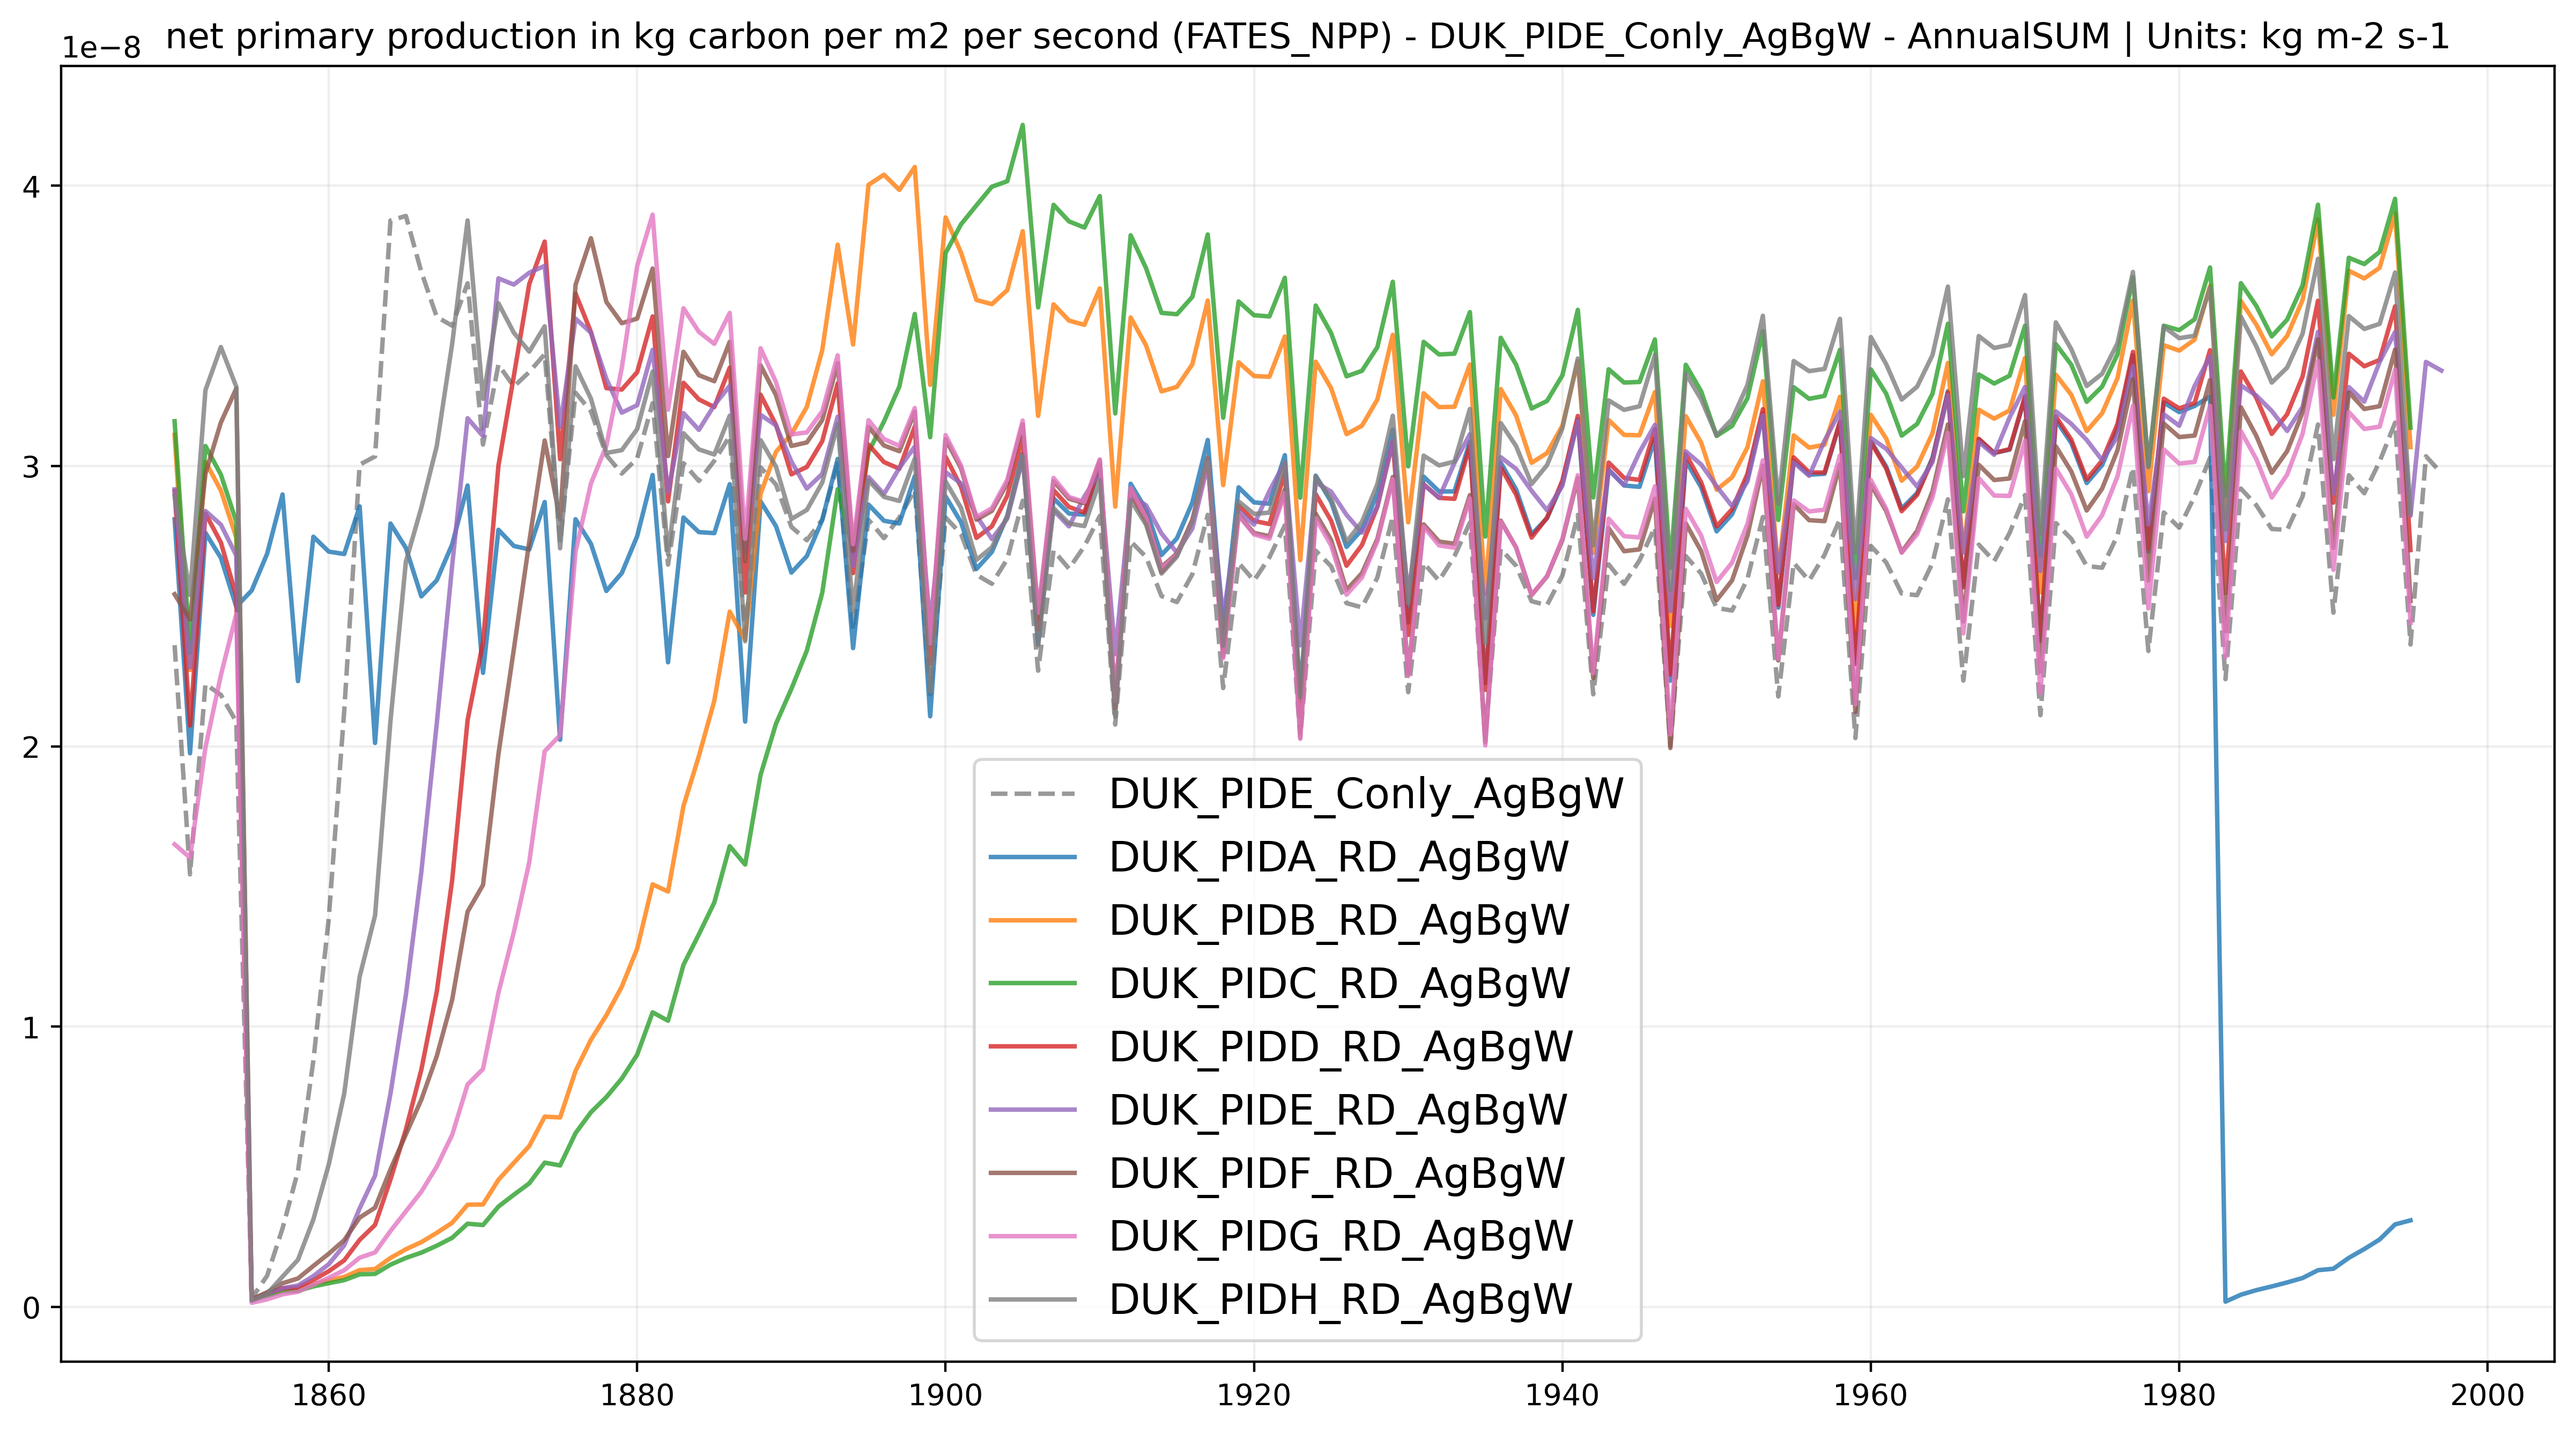

In [26]:
var = "FATES_NPP"
fig, axs = plt.subplots(1,1 , figsize=(15,8), dpi=400)

key = "DUK_PIDE_Conly_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, 'k--', label = key, alpha =.4)
axs.set_title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")

key = "DUK_PIDA_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)

key = "DUK_PIDB_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)

key = "DUK_PIDC_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)

key = "DUK_PIDD_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)

key = "DUK_PIDE_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)

key = "DUK_PIDF_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)

key = "DUK_PIDG_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)

key = "DUK_PIDH_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)

axs.grid(alpha=.2)
axs.legend(fontsize=14)

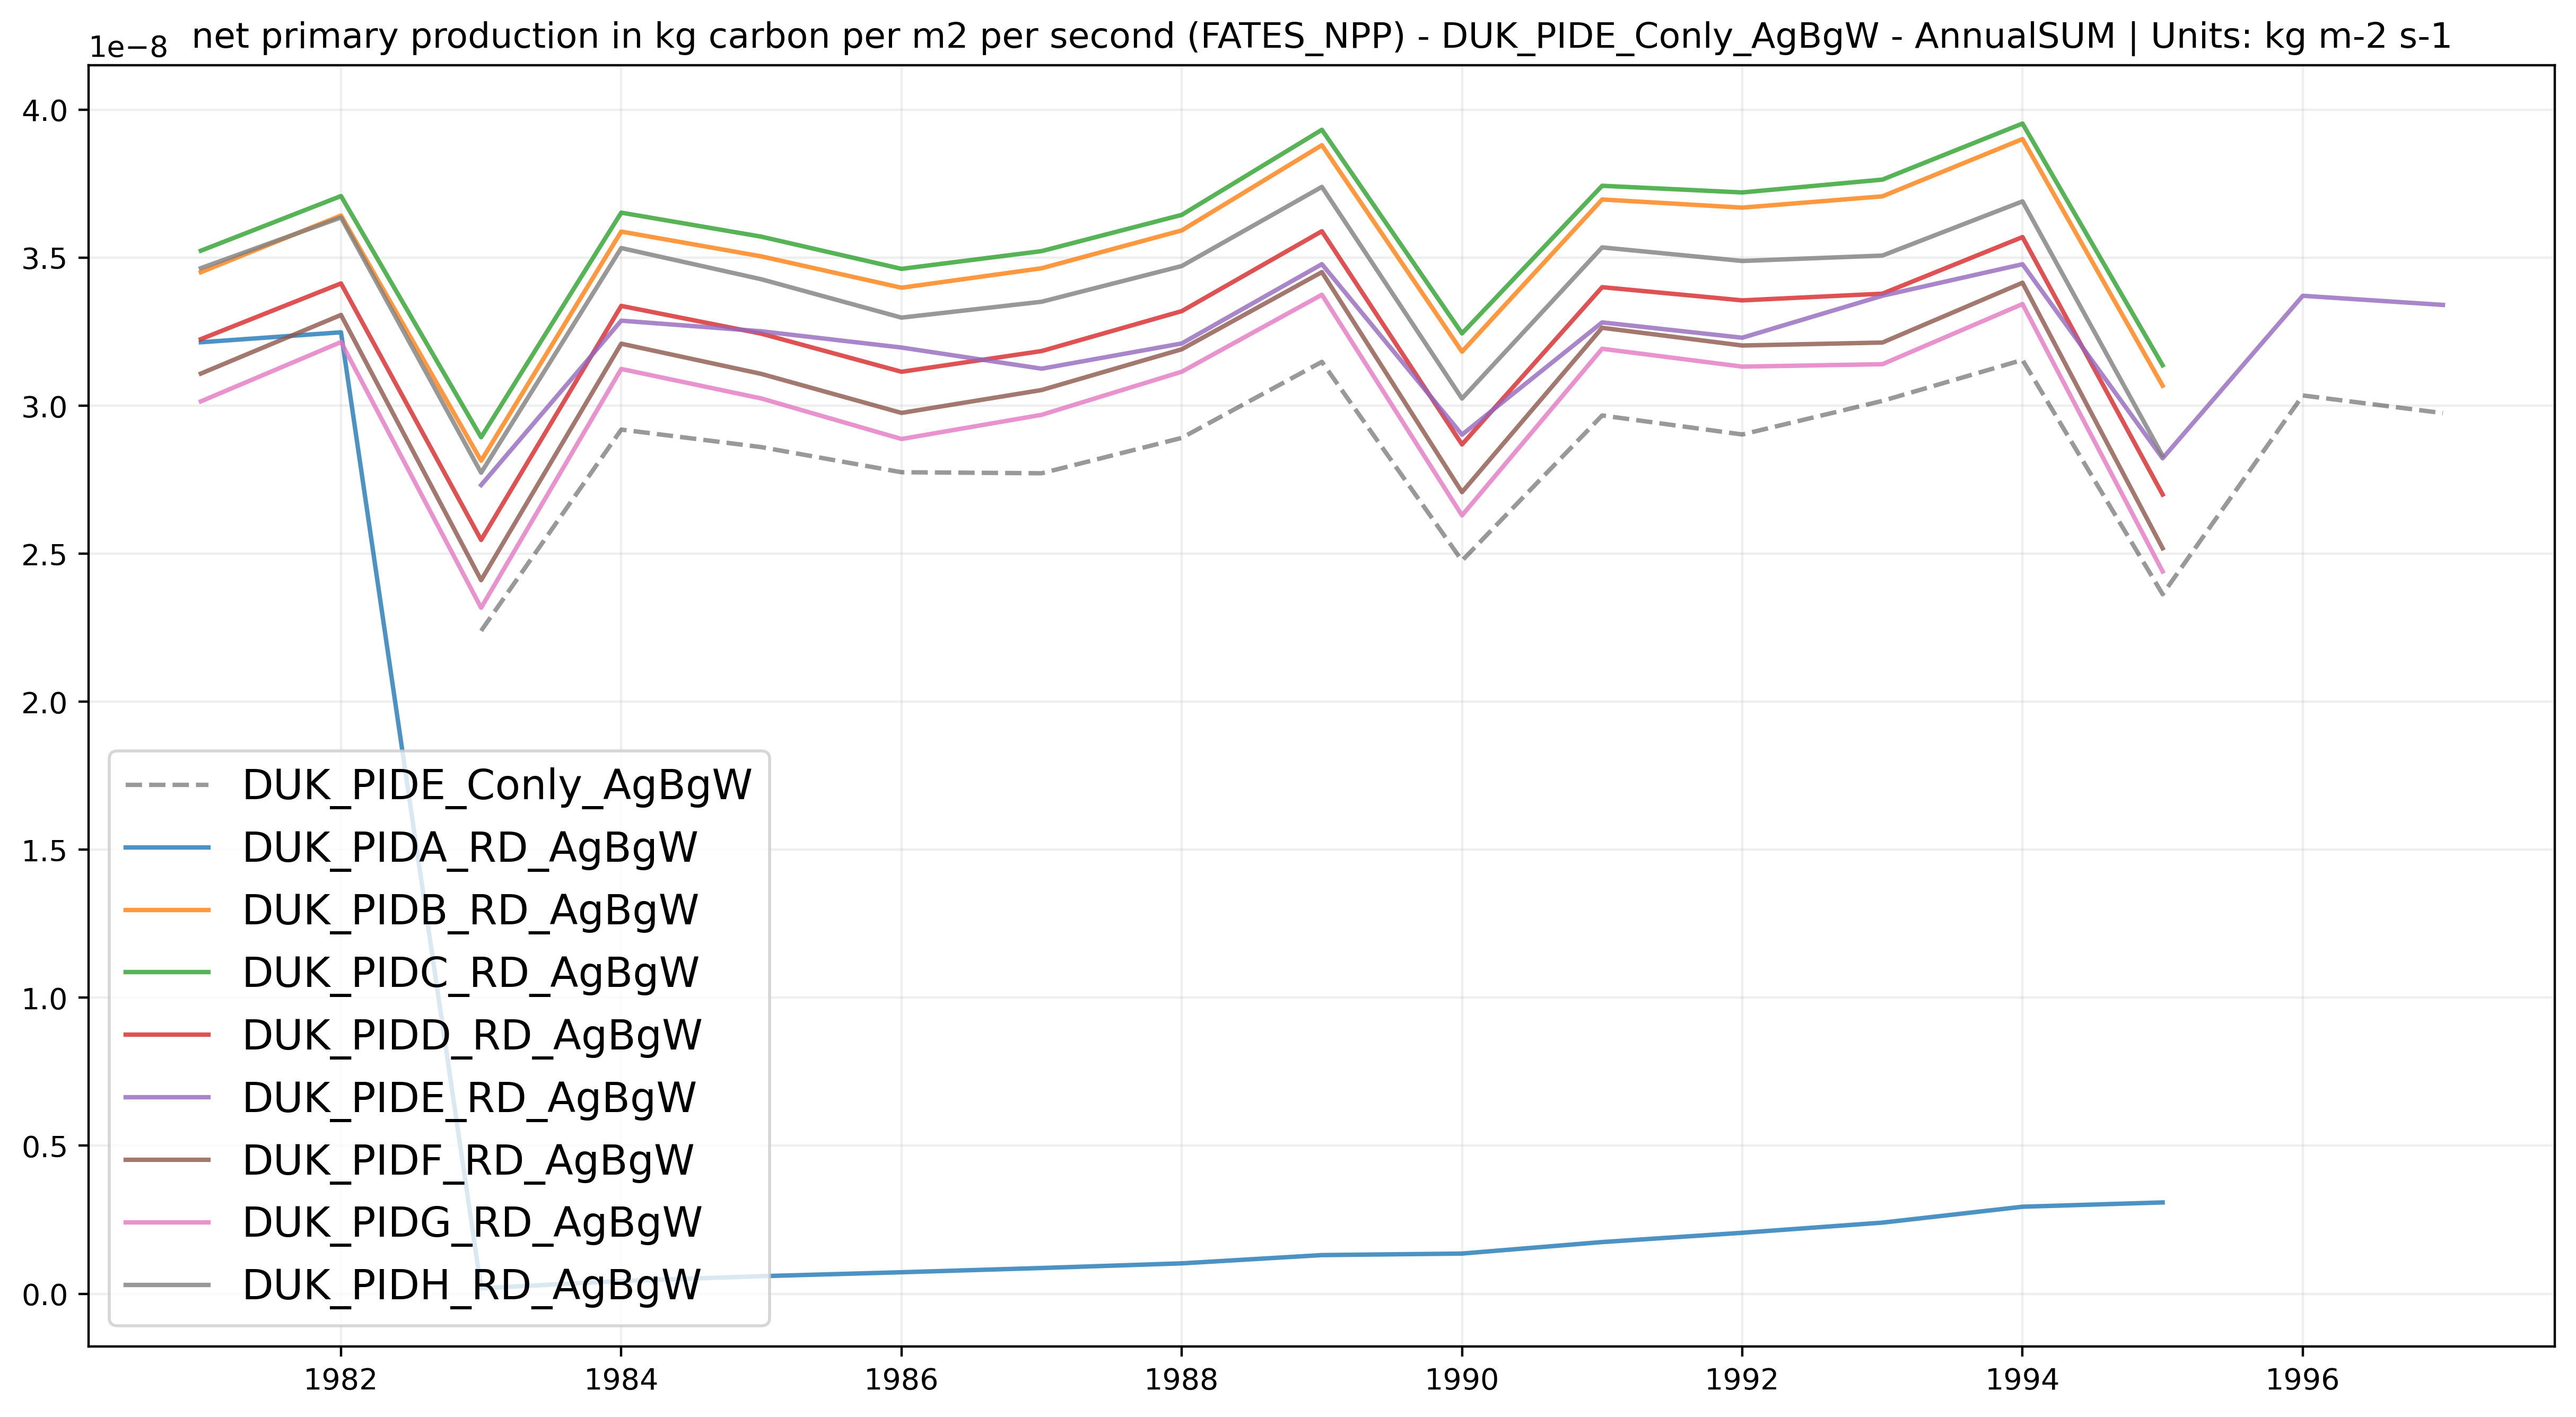

In [27]:
var = "FATES_NPP"
fig, axs = plt.subplots(1,1 , figsize=(15,8), dpi=400)

key = "DUK_PIDE_Conly_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], 'k--', label = key, alpha =.4)
axs.set_title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")

key = "DUK_PIDA_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)

key = "DUK_PIDB_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)

key = "DUK_PIDC_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)

key = "DUK_PIDD_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)

key = "DUK_PIDE_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)

key = "DUK_PIDF_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)

key = "DUK_PIDG_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)

key = "DUK_PIDH_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)

axs.grid(alpha=.2)
axs.legend(fontsize=14)

In [15]:
ts_data.year[-15:]

<xarray.DataArray 'year' (year: 15)>
array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995])
Coordinates:
  * year     (year) int64 1981 1982 1983 1984 1985 ... 1991 1992 1993 1994 1995

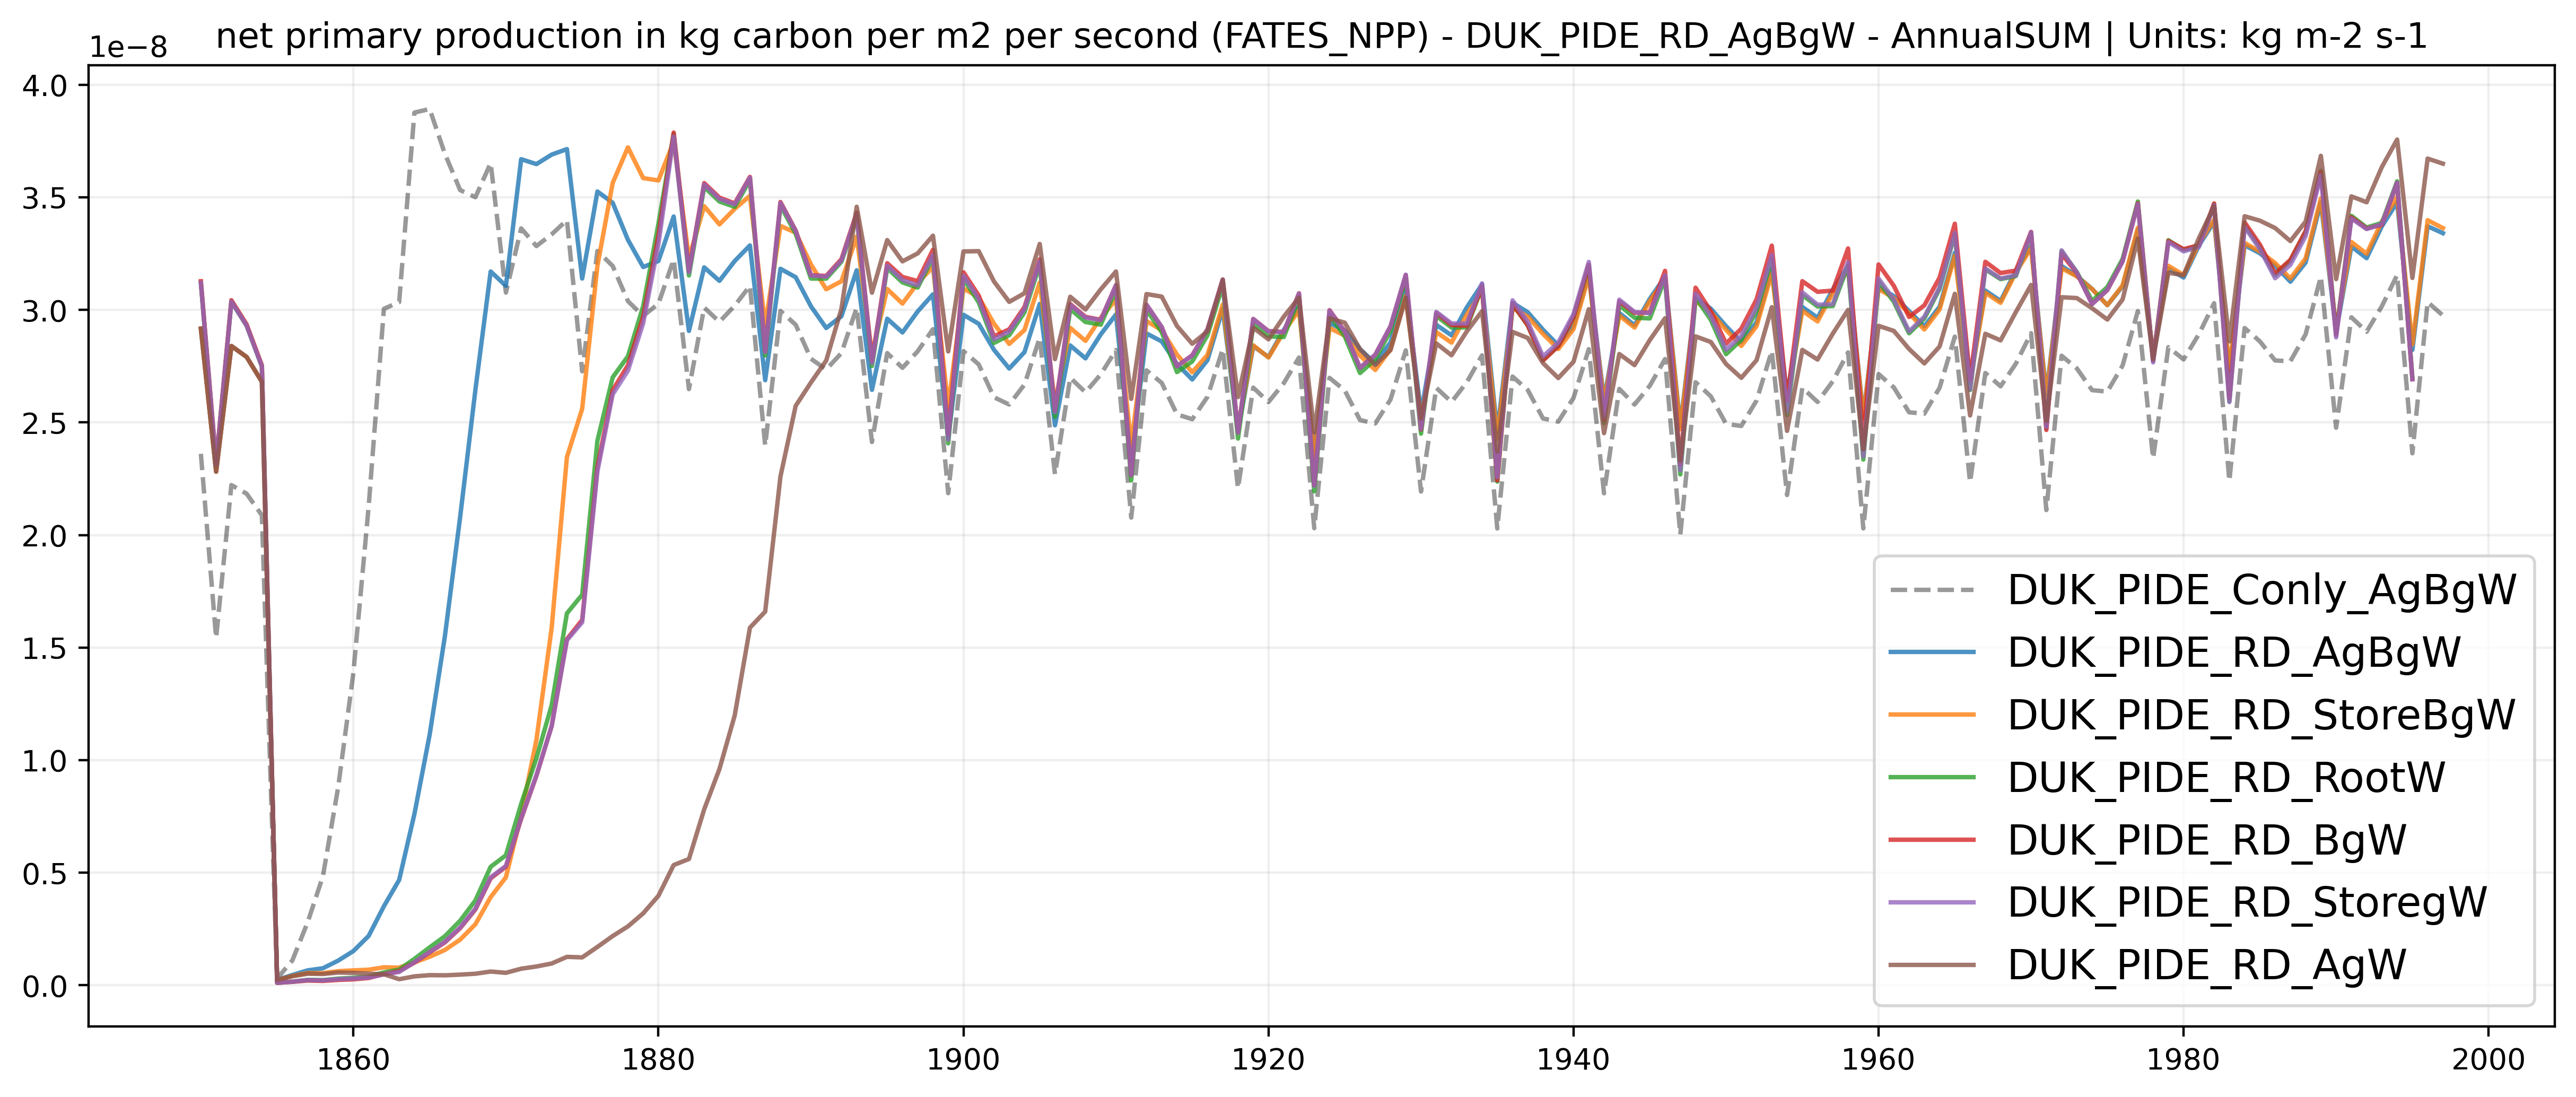

In [30]:
var = "FATES_NPP"
fig, axs = plt.subplots(1,1 , figsize=(15,6), dpi=400)

key = "DUK_PIDE_Conly_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, 'k--', label = key, alpha =.4)
axs.set_title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")

key = "DUK_PIDE_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)
axs.set_title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")

'''
key = "DUK_PIDE_RD_StoreRootBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)
'''
key = "DUK_PIDE_RD_StoreBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)

key = "DUK_PIDE_RD_RootW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)

key = "DUK_PIDE_RD_BgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)

key = "DUK_PIDE_RD_StoregW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)

key = "DUK_PIDE_RD_AgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)

#key = "DUK_PIDE_RD_FineRootW"
#ts_data = ds[key][var].groupby("time.year").mean('time')
#axs.plot(ts_data.year, ts_data, label = key, alpha =0.8)

axs.grid(alpha=.2)
axs.legend(fontsize=14)

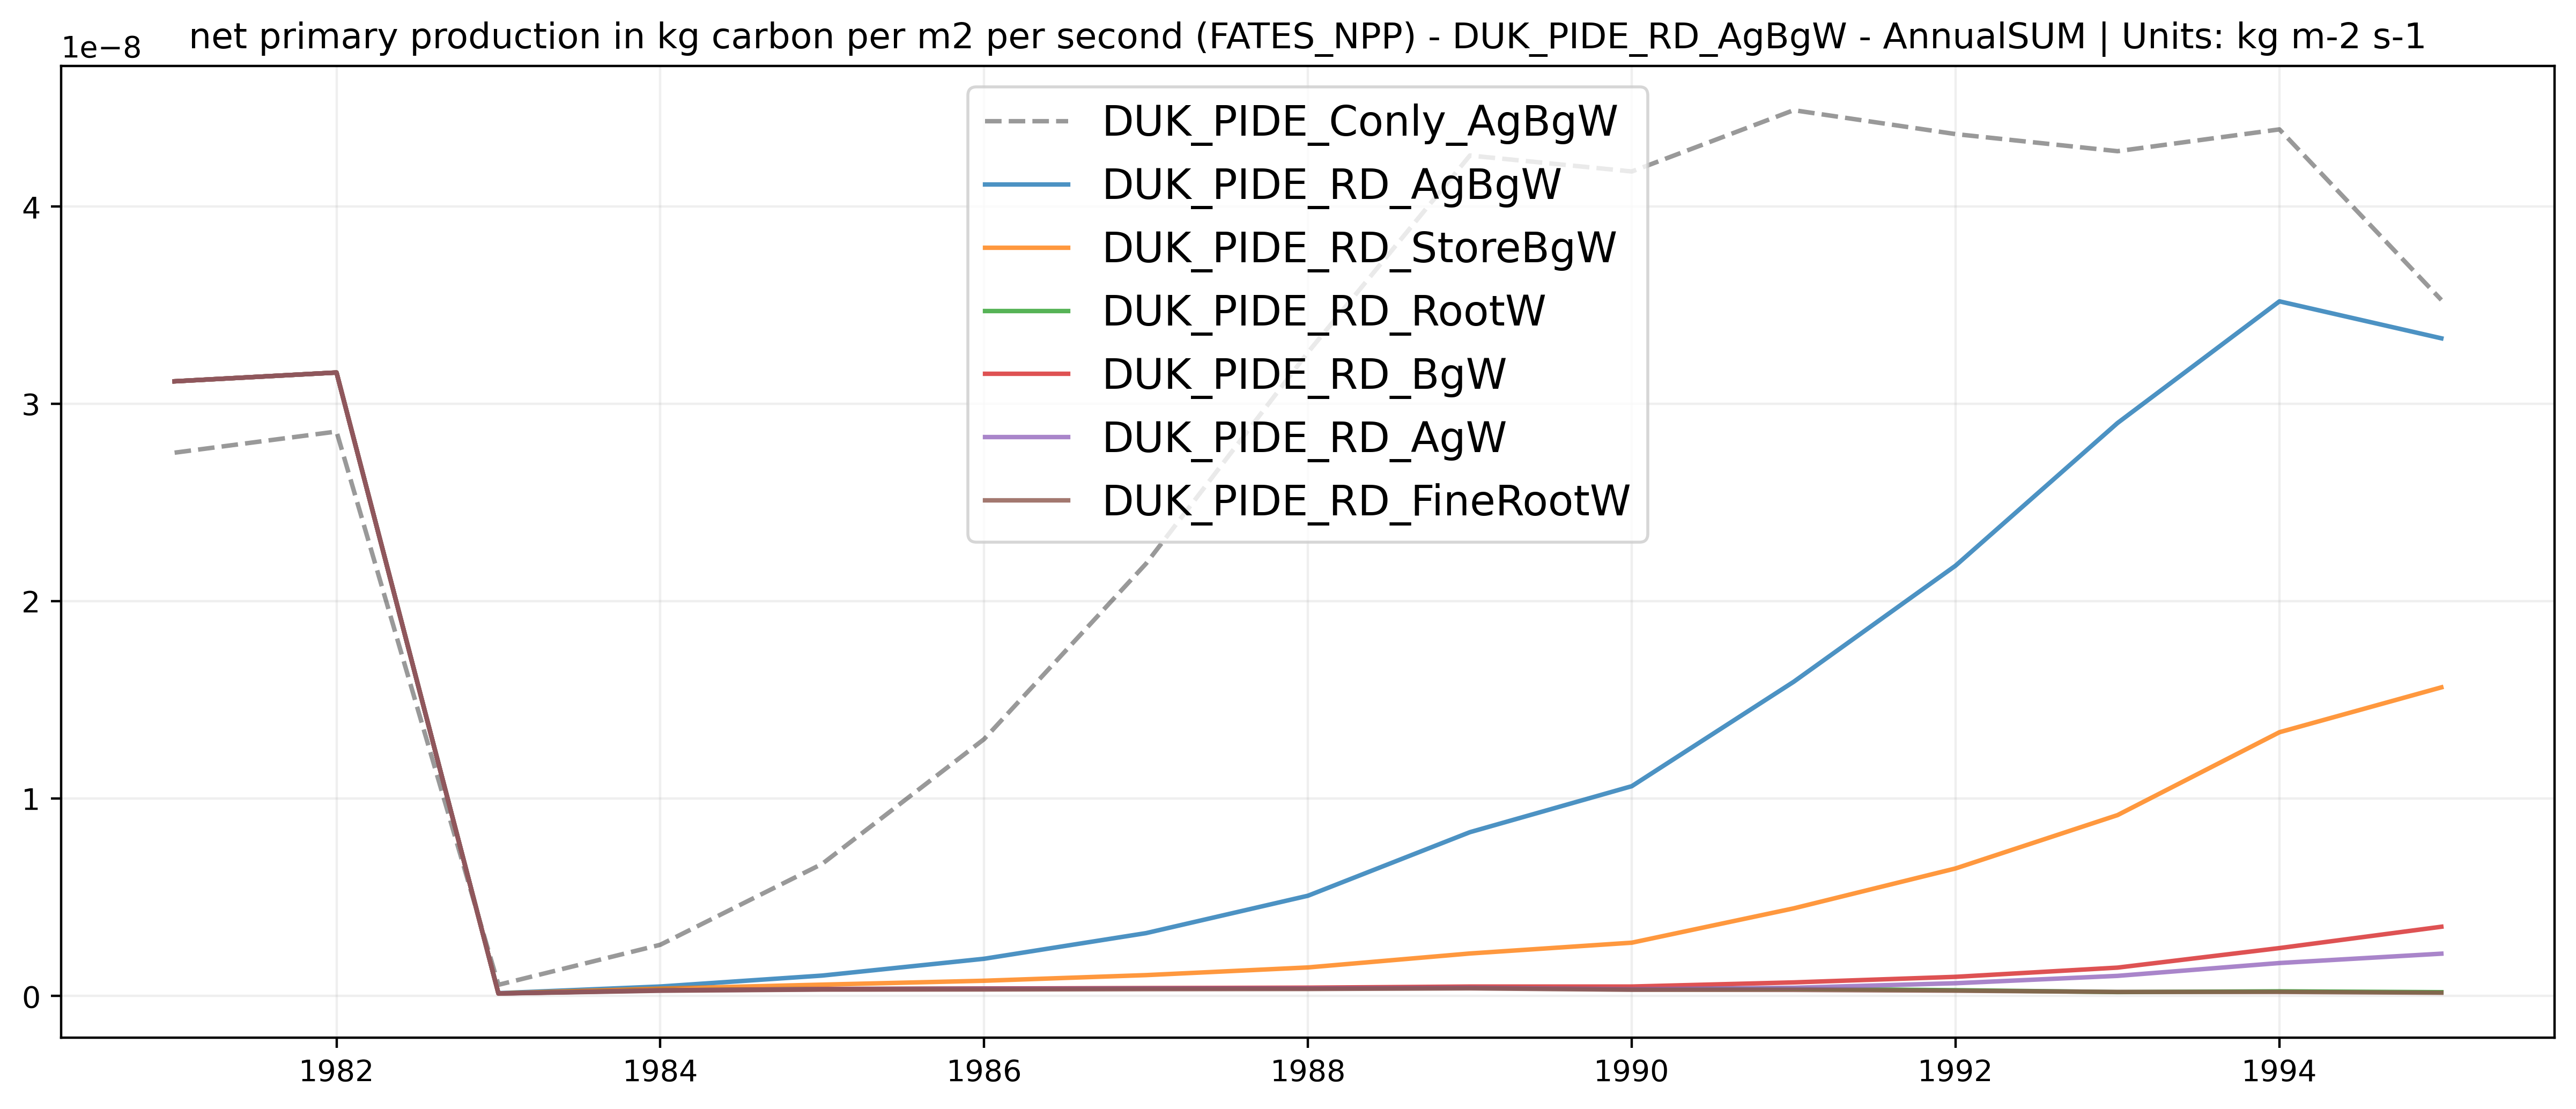

In [54]:
var = "FATES_NPP"
fig, axs = plt.subplots(1,1 , figsize=(15,6), dpi=400)

key = "DUK_PIDE_Conly_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], 'k--', label = key, alpha =.4)
axs.set_title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")

key = "DUK_PIDE_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)
axs.set_title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")

'''
key = "DUK_PIDE_RD_StoreRootBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)
'''
key = "DUK_PIDE_RD_StoreBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)

key = "DUK_PIDE_RD_RootW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)

key = "DUK_PIDE_RD_BgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)
'''
key = "DUK_PIDE_RD_StoregW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)
'''
key = "DUK_PIDE_RD_AgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)

key = "DUK_PIDE_RD_FineRootW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year[-15:], ts_data[-15:], label = key, alpha =0.8)

axs.grid(alpha=.2)
axs.legend(fontsize=14)

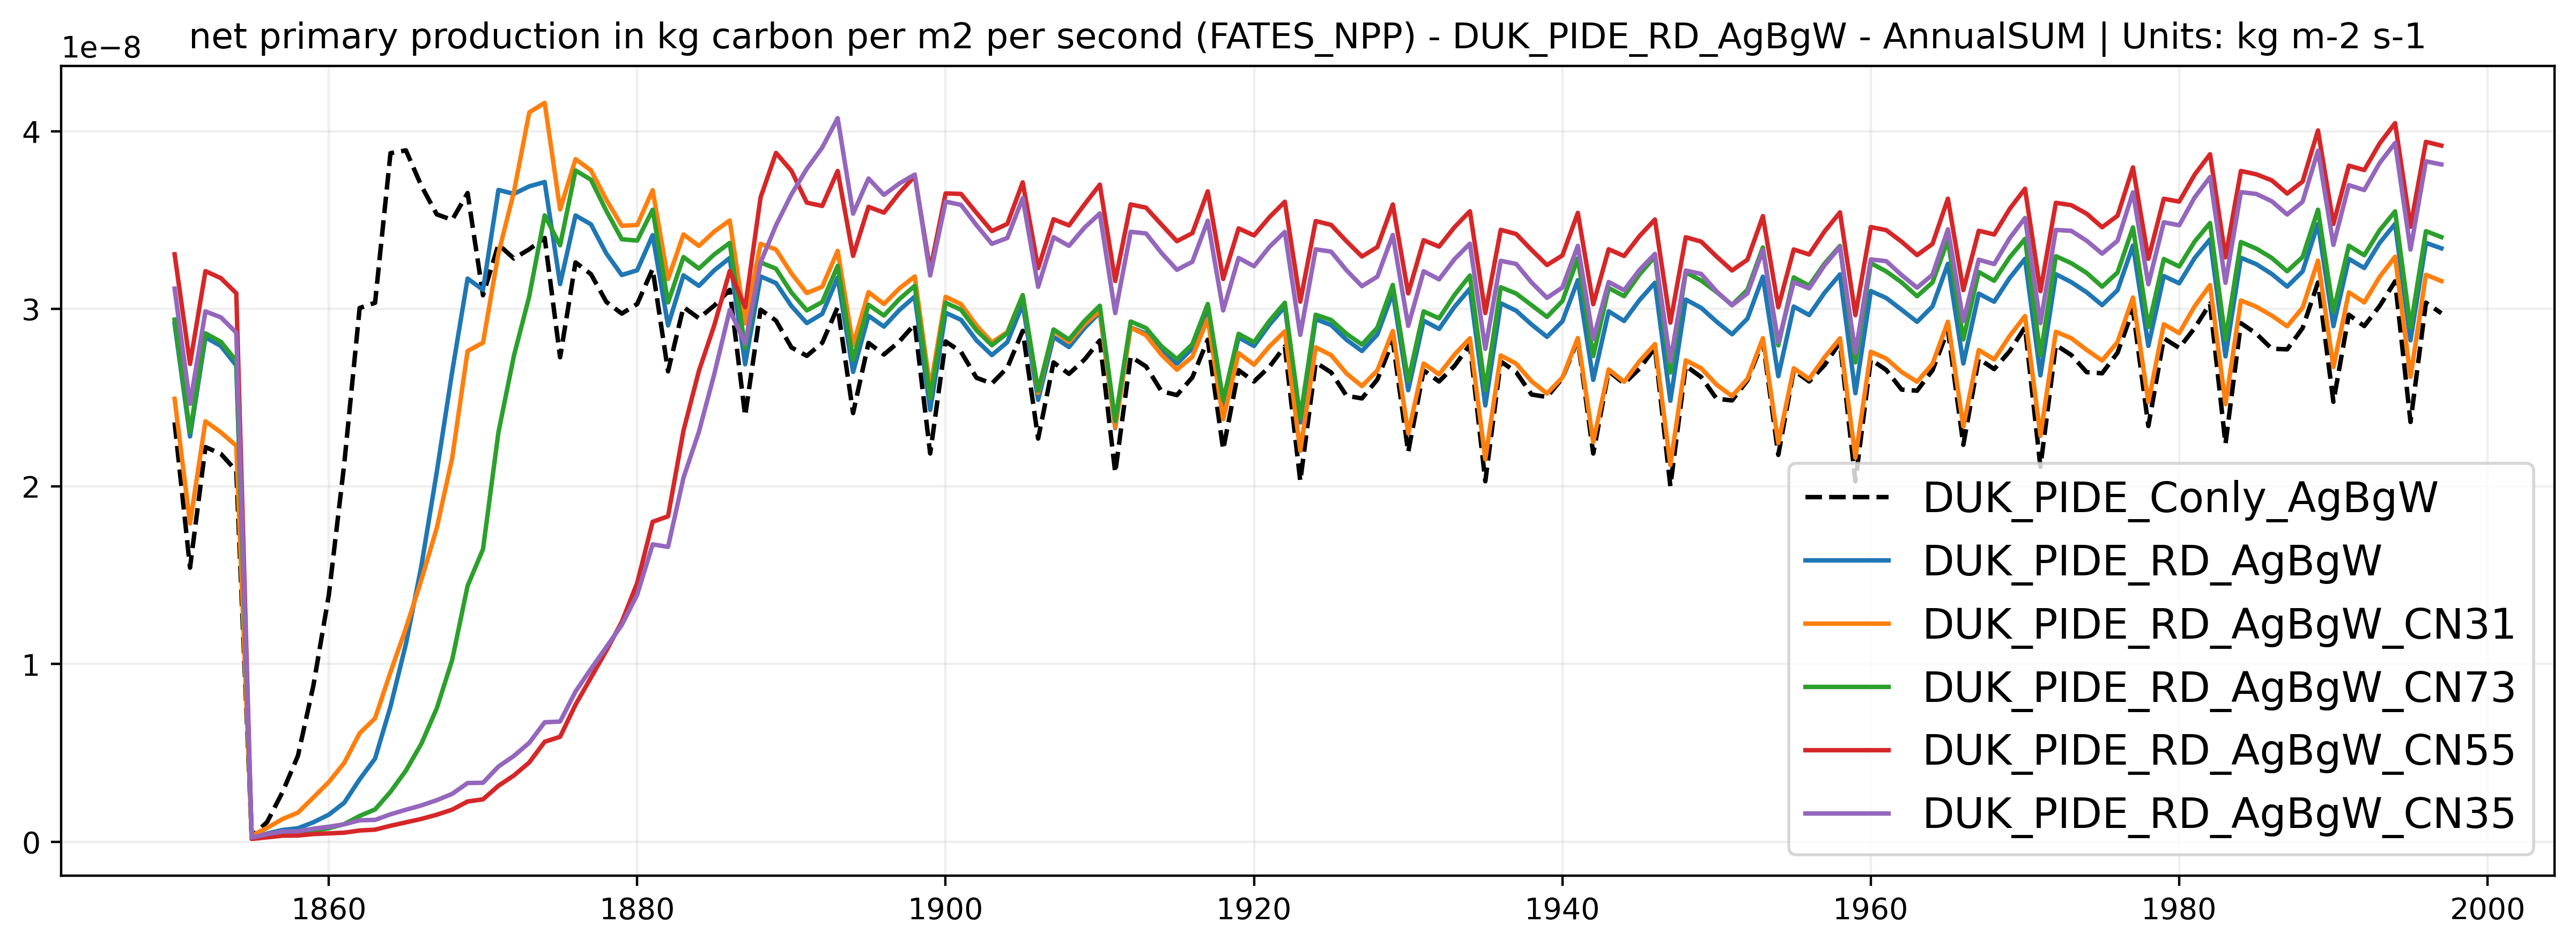

In [12]:
var = "FATES_NPP"
fig, axs = plt.subplots(1,1 , figsize=(15,5), dpi=400)
key = "DUK_PIDE_Conly_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, 'k--', label = key)
axs.set_title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")

key = "DUK_PIDE_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key)
axs.set_title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")

key = "DUK_PIDE_RD_AgBgW_CN31"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key)

key = "DUK_PIDE_RD_AgBgW_CN73"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key)

key = "DUK_PIDE_RD_AgBgW_CN55"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key)

key = "DUK_PIDE_RD_AgBgW_CN35"
ts_data = ds[key][var].groupby("time.year").mean('time')
axs.plot(ts_data.year, ts_data, label = key)




axs.grid(alpha=.2)
axs.legend(fontsize=14)

In [13]:
var = "FATES_NPP"
key = "DUK_PIDE_Conly_AgBgW"
ts_data_conly = ds[key][var].groupby("time.year").mean('time')

cors = {}
key = "DUK_PIDE_RD_AgBgW"
ts_data = ds[key][var].groupby("time.year").mean('time')
cors[key + ' Conly'] = np.corrcoef(np.array(ts_data_conly).flatten(), np.array(ts_data).flatten())[0, 1]

key = "DUK_PIDE_RD_AgBgW_CN31"
ts_data = ds[key][var].groupby("time.year").mean('time')
cors[key + ' Conly'] = np.corrcoef(np.array(ts_data_conly).flatten(), np.array(ts_data).flatten())[0, 1]

key = "DUK_PIDE_RD_AgBgW_CN73"
ts_data = ds[key][var].groupby("time.year").mean('time')
cors[key + ' Conly'] = np.corrcoef(np.array(ts_data_conly).flatten(), np.array(ts_data).flatten())[0, 1]

key = "DUK_PIDE_RD_AgBgW_CN55"
ts_data = ds[key][var].groupby("time.year").mean('time')
cors[key + ' Conly'] = np.corrcoef(np.array(ts_data_conly).flatten(), np.array(ts_data).flatten())[0, 1]

key = "DUK_PIDE_RD_AgBgW_CN35"
ts_data = ds[key][var].groupby("time.year").mean('time')
cors[key + ' Conly'] = np.corrcoef(np.array(ts_data_conly).flatten(), np.array(ts_data).flatten())[0, 1]

cors

{'DUK_PIDE_RD_AgBgW Conly': 0.6086129729952743,
 'DUK_PIDE_RD_AgBgW_CN31 Conly': 0.6457571946782127,
 'DUK_PIDE_RD_AgBgW_CN73 Conly': 0.4137537198050952,
 'DUK_PIDE_RD_AgBgW_CN55 Conly': 0.10999760016444377,
 'DUK_PIDE_RD_AgBgW_CN35 Conly': 0.12790347606389124}